In [105]:
# Importing libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [107]:
# Reading the dataset

In [108]:
df = pd.read_csv('Clean_Dataset.csv')

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [109]:
# 'Unnamed' column is of no use so we are dropping it
df = df.drop('Unnamed: 0', axis=1)
df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [110]:
df.shape

(300153, 11)

In the data, there are 300153 observations with 11 features.



In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [112]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [113]:
# There is no missing value in the data.

In [114]:
numerical_features = [numeric for numeric in df.columns if df[numeric].dtype != 'O']
df[numerical_features].head()

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955


In [115]:
# There are 3 numeric features in the data: duration, days_left and price.

In [116]:
categorical_features = [categoric for categoric in df.columns if df[categoric].dtype == 'O']
df[categorical_features].head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy


In [117]:
# There are 8 categorical features in the data: airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class

## Statistical interpretation of data

In [118]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [119]:
print (df['price'].median())

7425.0


In [120]:
# Median of the price of tickets are 7425.0

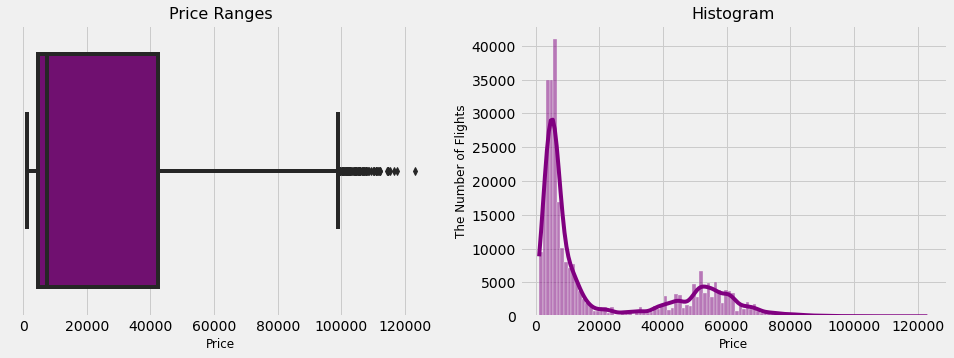

In [121]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df, color="purple")
plt.title('Price Ranges',fontsize=16)
plt.xlabel('Price',fontsize=12)

plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True, color="purple")
plt.title('Histogram',fontsize=16)
plt.xlabel('Price',fontsize=12)
plt.ylabel('The Number of Flights',fontsize=12)
plt.show()

In [122]:
# As the mean price is 20890, the median is 7425. 
# The histogram graph shows a right-skewed distribution. The majority of prices in the data are between 1000 and 20000, on the other hand the tail of the distribution extends far past these peaks. 
# This can be related with the price difference between economy and business class.

## Variation of ticket price between Economy and Business class

In [123]:
# To understand the price difference between the economy and business class, price histogram for economy and business seperately need to be plotted

In [124]:
df1 = df.loc[df["class"]=='Economy']
df2 = df.loc[df["class"]=='Business']

In [125]:
print (df1['price'].median())
print (df2['price'].median())

5772.0
53164.0


In [126]:
print (df1['price'].mean())
print (df2['price'].mean())

6572.342383362527
52540.08112357868


In [127]:
# Median and mean price of economy class is 5772.0 and 6572.34 respectively.
# Median and mean price of business class is 53164.0 and 52540.08 respectively.  

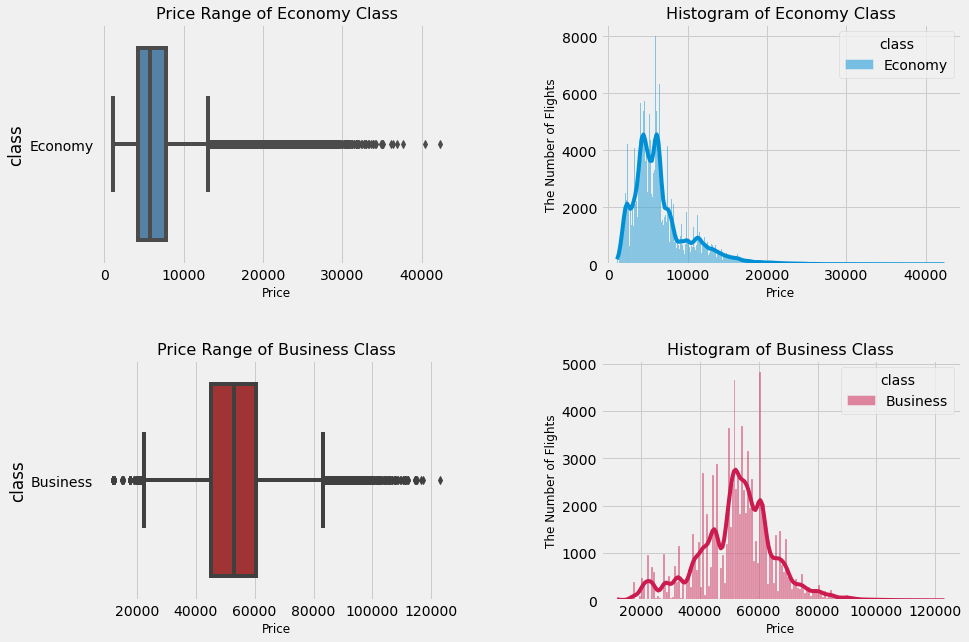

In [128]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,2,1)
sns.boxplot(y = 'class', x='price', data = df.loc[df["class"]=='Economy'], color="steelblue")
plt.title('Price Range of Economy Class',fontsize=16)
plt.xlabel('Price',fontsize=12)

plt.subplot(2,2,3)
sns.boxplot(y = 'class', x='price', data = df.loc[df["class"]=='Business'], color="firebrick")
plt.title('Price Range of Business Class',fontsize=16)
plt.xlabel('Price',fontsize=12)

plt.subplot(2,2,2)
sns.histplot(x = 'price', data = df.loc[df["class"]=='Economy'], kde = True, hue='class')
plt.title('Histogram of Economy Class',fontsize=16)
plt.xlabel('Price',fontsize=12)
plt.ylabel('The Number of Flights',fontsize=12)

plt.subplot(2,2,4)
sns.histplot(x = 'price', data = df.loc[df["class"]=='Business'], kde = True, hue='class', palette='rocket')
plt.title('Histogram of Business Class',fontsize=16)
plt.xlabel('Price',fontsize=12)
plt.ylabel('The Number of Flights',fontsize=12)
plt.show()

In [129]:
# Most of the prices in economy class are between 1000 and 8000. The histogram graph shows no skew distribution.
# Most of the prices in business class are between 12000 and 60000.The histogram graph shows no skew distribution.

In [130]:
# It can be concluded that ticket prices vary between classes as the mean price of Business class tickets are almost 8 times of the mean price of Economy Class tickets.

## Variation of ticket prices between Airlines

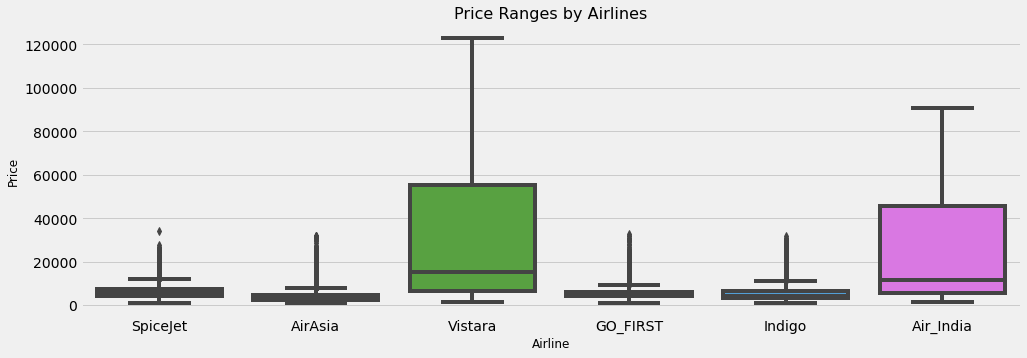

In [131]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='husl')
plt.title('Price Ranges by Airlines',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

In [132]:
# Vistara and Air India have wider Price range and they have expensive tickets than other airlines.
# Since there is price variance between the price of Economy and Business class tickets,this can be related with the distribution of economy and business tickets in the airlines flight options.

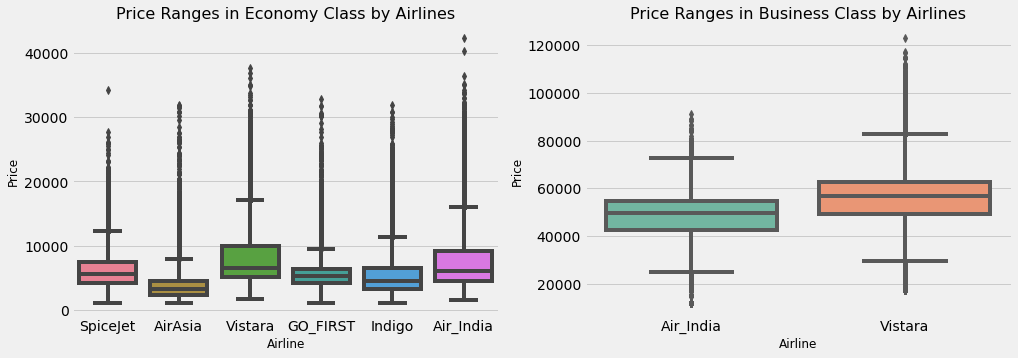

In [133]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'airline', y='price', data = df.loc[df["class"]=='Economy'], palette='husl')
plt.title('Price Ranges in Economy Class by Airlines',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(x = 'airline', y='price', data = df.loc[df["class"]=='Business'], palette='Set2')
plt.title('Price Ranges in Business Class by Airlines',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

In [ ]:
# As Economy Class tickets are offered by all 6 airlines, Business Class tickets are only available in two airline companies that Air India and Vistara.
# In Economy Class, the graph shows that AirAsia offers the cheapest tickets, as Vistara and Air India offer expensive tickets compared to other airlines.
# In Business Class, the graph shows that Vistara mostly offers expensive prices than Air India.

## Flight duration and its effect on ticket prices

Text(0, 0.5, 'Price')

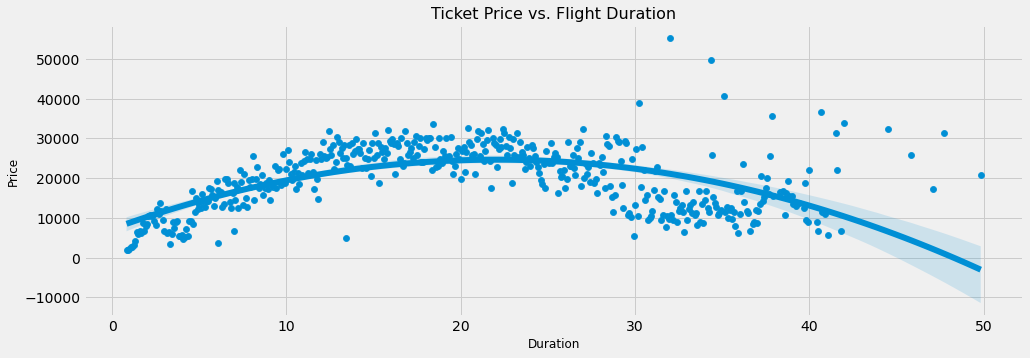

In [73]:
dfduration = df.groupby(['duration'])['price'].mean().reset_index()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.scatterplot(data=dfduration, x="duration", y="price")
sns.regplot(data=dfduration, x="duration", y="price", order=2)
plt.title('Ticket Price vs. Flight Duration',fontsize=16)
plt.xlabel('Duration',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

In [ ]:
# The regression curve shows the relationship between duration and ticket price. According to the graph, ticket price increases as the flight duration increases till 20 hours. After 20 hours, the ticket price decreases as the flight duration increases.

## Effect of stops on ticket prices

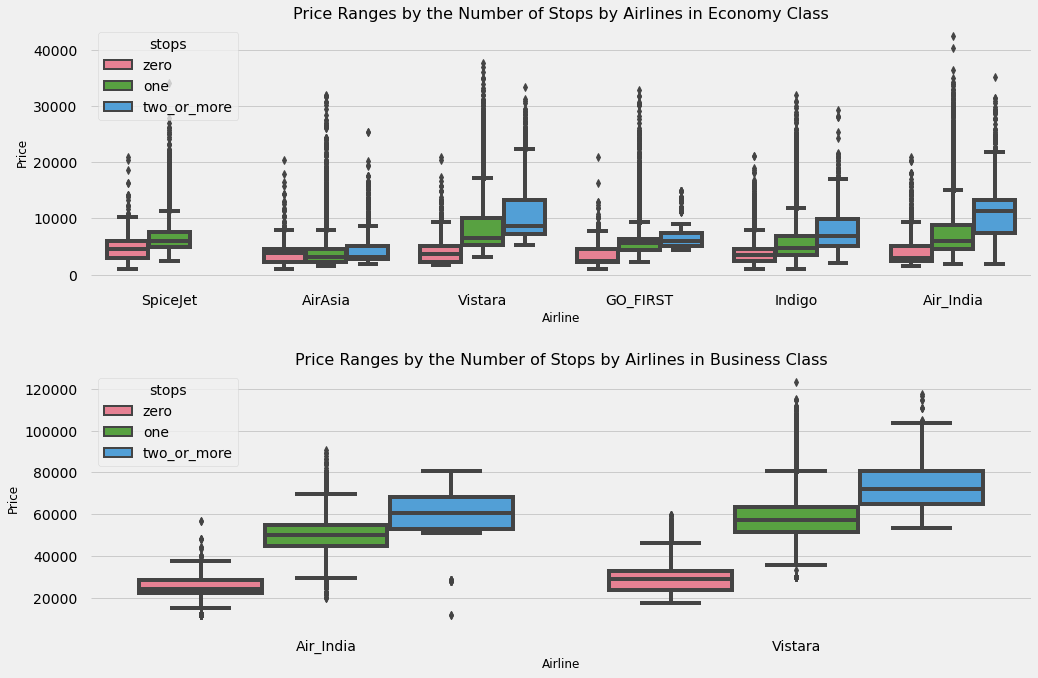

In [74]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.boxplot(x="airline", y="price",
            hue="stops", palette='husl',
            data=df.loc[df["class"]=='Economy'])
sns.despine(offset=10, trim=True)
plt.title('Price Ranges by the Number of Stops by Airlines in Economy Class',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)

plt.subplot(2,1,2)
sns.boxplot(x="airline", y="price",
            hue="stops", palette='husl',
            data=df.loc[df["class"]=='Business'])
sns.despine(offset=10, trim=True)
plt.title('Price Ranges by the Number of Stops by Airlines in Business Class',fontsize=16)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)

plt.tight_layout(pad=2.0)

In [ ]:
# In Economy Class, the graph shows that the more stops there are, the higher ticket price there are for all airlines except for Air Asia. The ticket price ranges of Air Asia for different number of stops seem similar. For this reason, The Air Asia can be the low cost airline company.
# In Business Class, the graph shows that the more stops there are, the higher ticket price there are for all two airlines.

# For both classes, we can say that the number of stops effect the ticket price.

## Effect of remaining days in departure on ticket prices

Text(0, 0.5, 'Price')

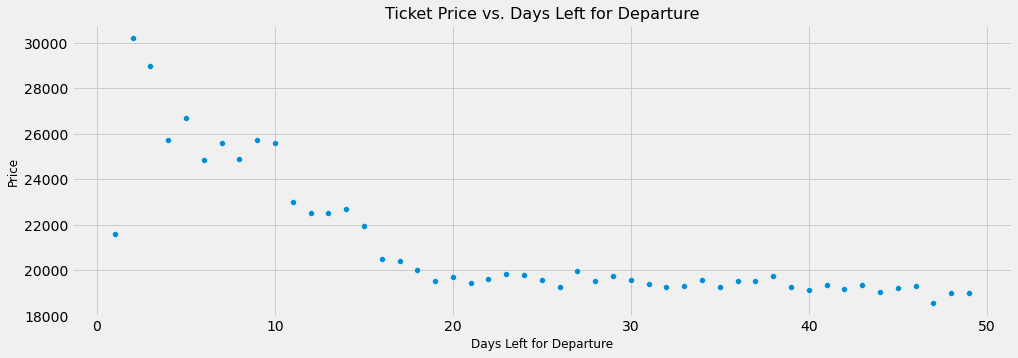

In [75]:
dfdaysleft = df.groupby(['days_left'])['price'].mean().reset_index()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.scatterplot(data=dfdaysleft, x="days_left", y="price")
plt.title('Ticket Price vs. Days Left for Departure',fontsize=16)
plt.xlabel('Days Left for Departure',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

Text(0, 0.5, 'Price')

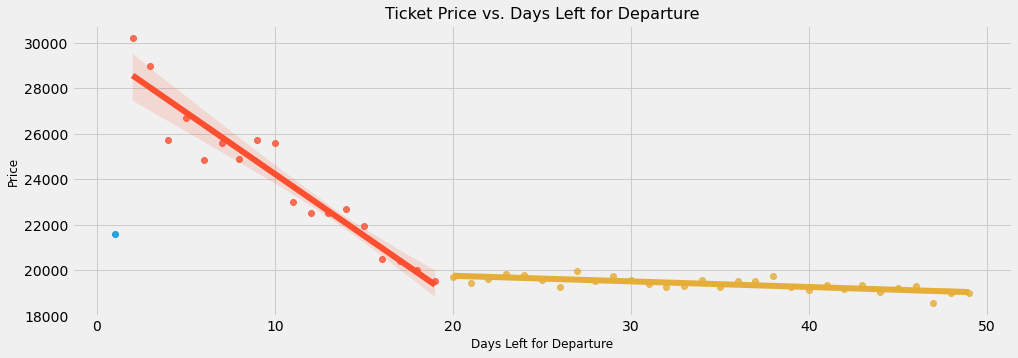

In [76]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x=dfdaysleft.loc[dfdaysleft["days_left"]==1].days_left, y=dfdaysleft.loc[dfdaysleft["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=dfdaysleft.loc[(dfdaysleft["days_left"]>1)&(dfdaysleft["days_left"]<20)].days_left, y=dfdaysleft.loc[(dfdaysleft["days_left"]>1)&(dfdaysleft["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=dfdaysleft.loc[dfdaysleft["days_left"]>=20].days_left, y=dfdaysleft.loc[dfdaysleft["days_left"]>=20].price, fit_reg=True, ax=ax)
plt.title('Ticket Price vs. Days Left for Departure',fontsize=16)
plt.xlabel('Days Left for Departure',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

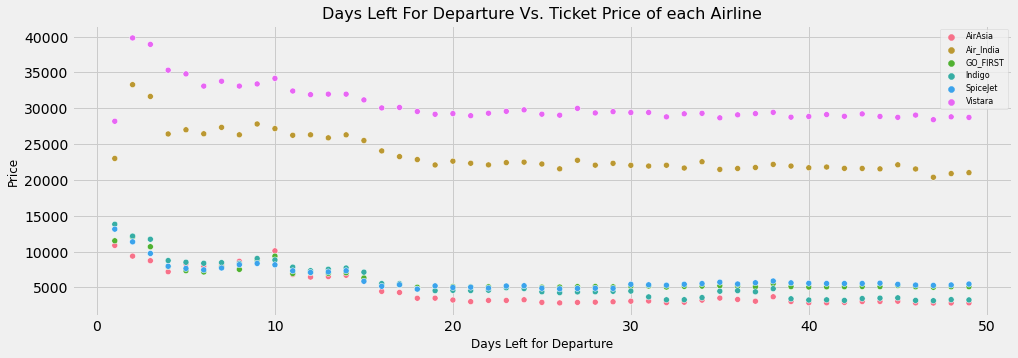

In [77]:
dfdaysleft2 = df.groupby(['days_left','airline'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
sns.scatterplot(data=dfdaysleft2,x='days_left',y='price',color='magenta',hue='airline',palette='husl')
plt.title('Days Left For Departure Vs. Ticket Price of each Airline',fontsize=16)
plt.legend(fontsize=8, loc='upper right')
plt.xlabel('Days Left for Departure',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

1. The scatter plots show the relationship between days left for the departure and ticket price. In the plots there are two patterns. The first pattern is stable ticket price between 20 and 50 days left for the departure. The second pattern is negative relationship between the days left and ticket price between 2 and 20 days left for the departure. For this reason, we can say that days left for the departure effects the ticket price when there are less than 20 days for departure.


2. Additionally, ticket prices of Vistara and Air India drop one day before the flight, as the ticket prices of other airlines keep increase as the day left for departure decreases to one day. This reverse pattern can be related to the fact that Vistara and Air India offer business class tickets, as other airlines offer only economy class tickets. The demand and fill rate change pattern from two days left to one day left can be different for business and economy class tickets.

**Do the departure time and arrival time effect ticket prices?**

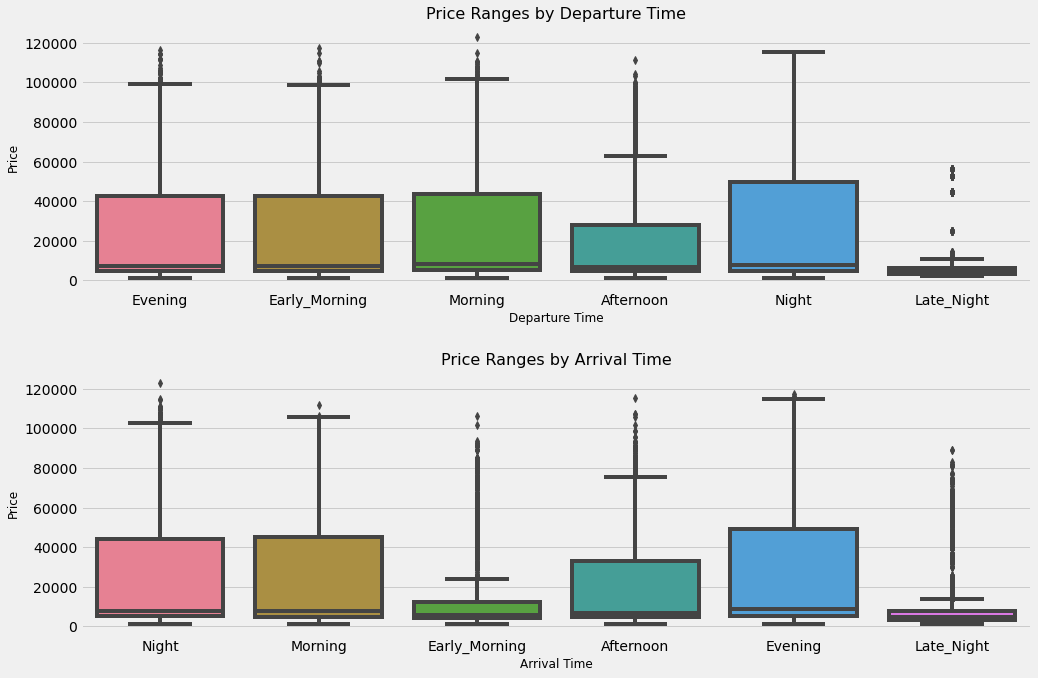

In [78]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='departure_time',y='price',data=df,palette='husl')
plt.title('Price Ranges by Departure Time',fontsize=16)
plt.xlabel('Departure Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(2,1,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='husl')
plt.title('Price Ranges by Arrival Time',fontsize=16)
plt.xlabel('Arrival Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.tight_layout(pad=2.0)
plt.show()

Flights leaving or arriving at late night have the cheaper prices compared to other times. In addition to late night, flights arriving in the early morning or leaving in the afternoon are cheaper than other options. On the other hand, flights leaving at night have the expensive prices compared to other times.

**Do the Source City and Destination City effect ticket prices?**

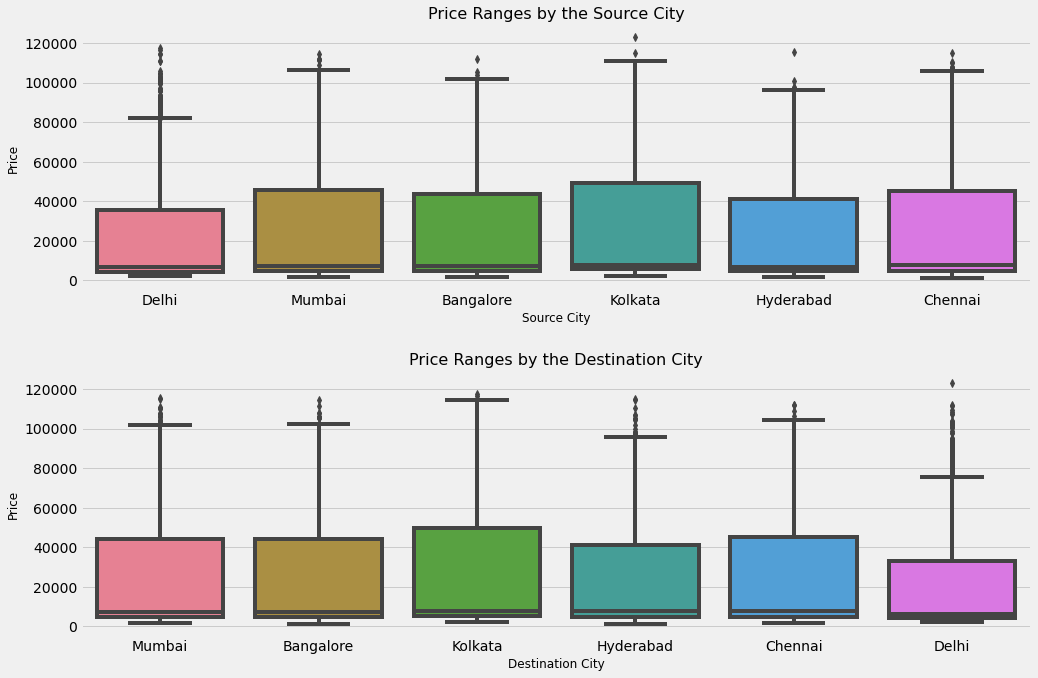

In [79]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x='source_city',y='price',data=df,palette='husl')
plt.title('Price Ranges by the Source City',fontsize=16)
plt.xlabel('Source City',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(2,1,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='husl')
plt.title('Price Ranges by the Destination City',fontsize=16)
plt.xlabel('Destination City',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.tight_layout(pad=2.0)
plt.show()

<Figure size 1080x360 with 0 Axes>

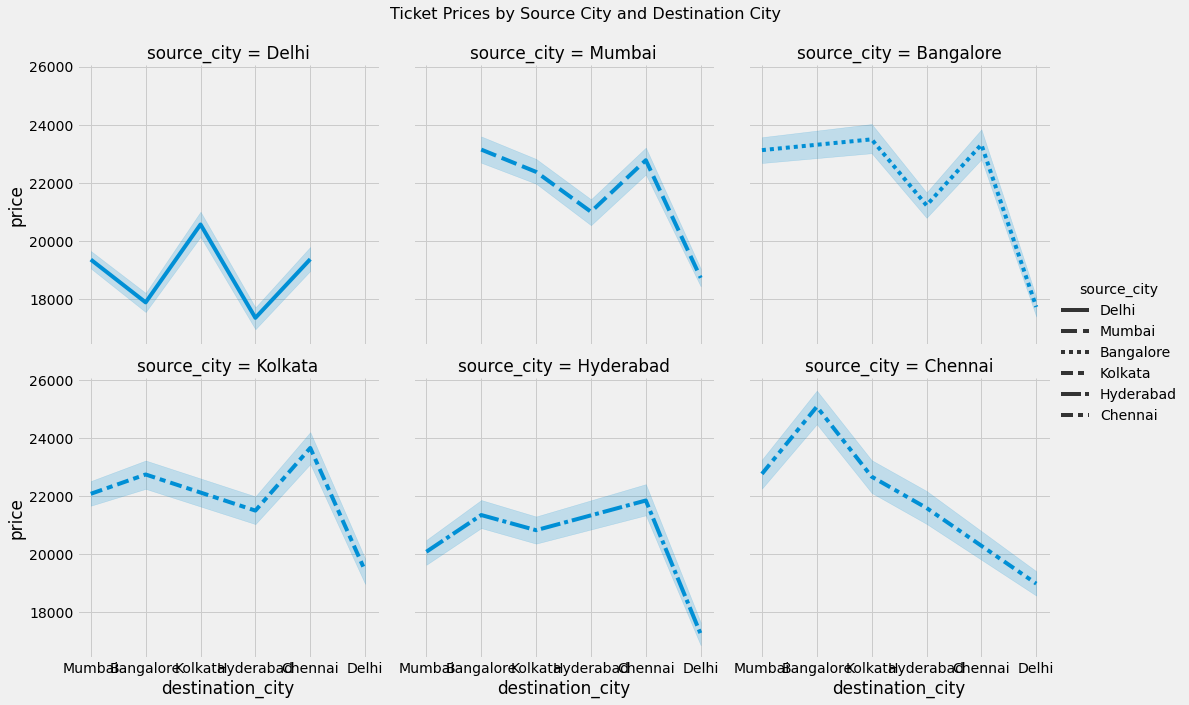

In [80]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3, style='source_city')
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Ticket Prices by Source City and Destination City',fontsize=16)
plt.show()

Flights leaving from or arriving at Delhi have the cheaper prices compared to other source and destination cities. On the other hand, other source and destination cities have similar price ranges.

**Which features effect the ticket prices mostly?**

Firstly, I will conduct correlation analysis to understand linear relationship between features and price. Since there are 8 categoric variables in the data, I will encode them via dummy variables.

In [81]:
df_bk=df.copy()

In [82]:
def preprocessing(df):
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)   
    return df

In [83]:
df_preprocessed = preprocessing(df)

In [84]:
df_preprocessed.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


**Correlation Analysis¶**

In [85]:
df_preprocessed.corr().T

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
stops,1.000000,0.001027,0.468059,-0.008540,0.119648,0.060215,-0.033363,-0.172133,-0.087293,0.098758,0.021379,-0.052321,0.011196,0.046828,-0.022452,0.060865,-0.104565,0.029073,0.062722,-0.046849,0.010145,-0.041882,-0.035366,0.052600,-0.058166,-0.018657,0.070912,-0.018544,-0.045666,0.017965
class,0.001027,1.000000,0.138710,-0.013039,0.937860,0.124899,-0.194540,-0.275477,-0.118325,0.302116,0.010204,-0.014098,0.003367,-0.019162,0.015941,0.012331,-0.021200,0.007564,-0.012987,0.010573,-0.012120,0.010789,-0.029378,0.002801,0.049516,-0.041974,0.032833,-0.086238,0.039745,0.008035
duration,0.468059,0.138710,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,0.033053,-0.049719,0.002595,0.061133,-0.023329,0.061271,-0.115412,0.065762,0.061440,-0.043900,-0.047092,0.104017,-0.045045,-0.071084,0.115464,0.010950,0.033094,-0.107301,0.122906,-0.064458
days_left,-0.008540,-0.013039,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,0.010817,0.000265,-0.008742,0.000456,0.006233,-0.000018,-0.003840,-0.004337,0.003322,-0.010238,0.012000,-0.003206,0.004004,0.020204,-0.013737,0.026500,-0.003619,-0.004593
price,0.119648,0.937860,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,-0.012828,0.016127,0.013206,0.018473,-0.052527,-0.008292,0.020956,0.010533,-0.012232,0.007946,-0.033768,0.018199,0.041768,-0.060449,0.056408,-0.093602,0.030379,0.020344
airline_Air_India,0.060215,0.124899,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,0.001987,-0.001883,0.036697,0.005760,-0.017354,0.010900,-0.006201,0.042490,0.033703,0.019692,-0.006956,-0.024826,0.010730,-0.025510,-0.040356,-0.059937,0.066735,-0.001920
airline_GO_FIRST,-0.033363,-0.194540,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,-0.023541,0.000409,0.026898,-0.059581,0.034305,-0.025814,-0.001016,0.026916,0.028405,-0.003699,0.008566,-0.040410,-0.025366,0.085654,-0.043881,0.100450,-0.063926,-0.000382
airline_Indigo,-0.172133,-0.275477,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,0.009778,0.016766,-0.029344,0.018089,-0.002593,0.000244,0.033801,-0.031242,-0.032224,-0.020572,0.077697,0.028371,-0.072394,0.013864,0.007335,0.065025,-0.082781,-0.009271
airline_SpiceJet,-0.087293,-0.118325,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,-0.050872,0.030020,-0.004572,-0.002283,0.040668,-0.050272,0.029817,-0.000058,0.033931,0.003626,-0.011630,-0.028322,0.005247,0.022834,-0.042162,0.003302,0.030808,0.013312
airline_Vistara,0.098758,0.302116,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,0.028317,-0.027183,-0.006793,0.027766,-0.038389,0.035434,-0.030555,-0.016810,-0.036206,-0.005037,-0.056948,0.056992,0.042486,-0.058766,0.091317,-0.135247,0.030260,0.024874


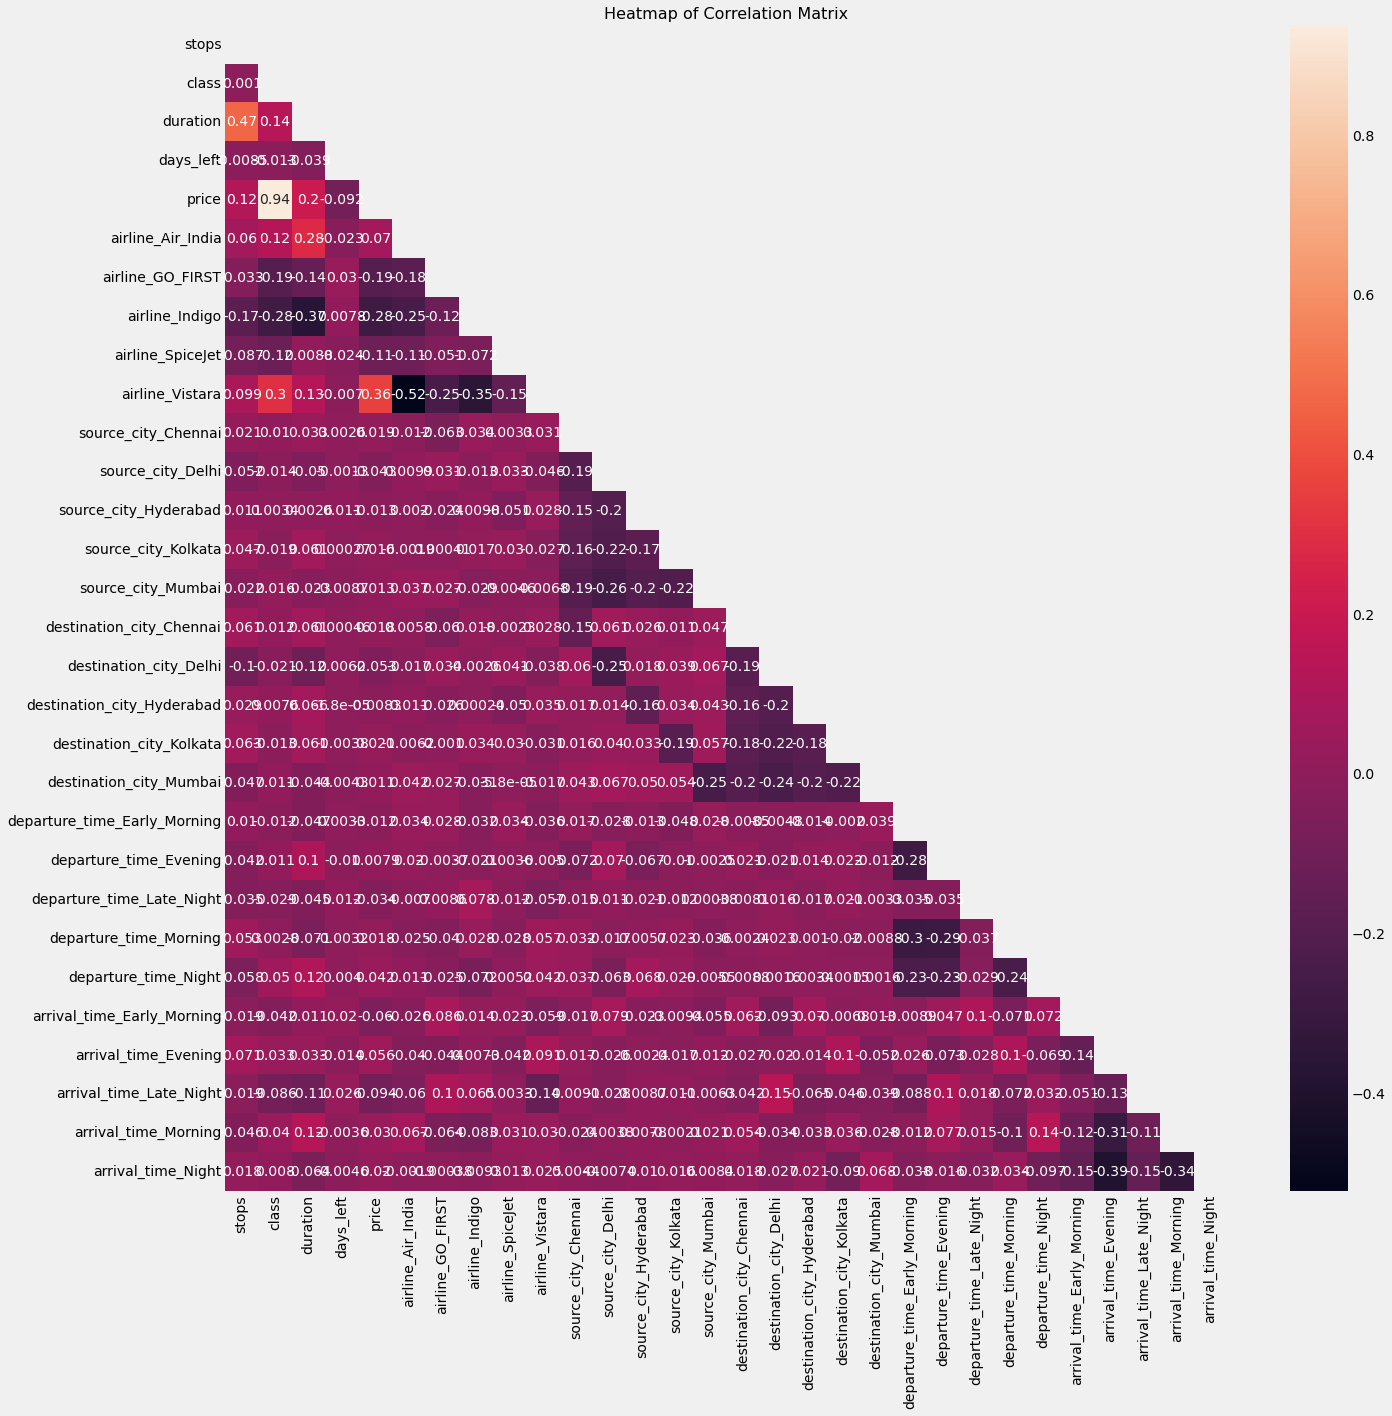

In [86]:
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))
plt.figure(figsize = (20,20))
corrMatrix = df_preprocessed.corr()
sns.heatmap(corrMatrix, mask=mask, annot=True)
plt.title('Heatmap of Correlation Matrix',fontsize=16)
plt.show()

According to Correlation matrix, there are strong correlation with Class and Price. It can be also concluded from the price range analysis in Class detail. In order to understand the predictive power of other features on ticket price, I will also implement mutual information.

In [87]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [88]:
X = df_preprocessed.copy()
y = X.pop('price')

mi_scores = make_mi_scores(X, y)

print(mi_scores)

duration                        2.416936
class                           0.618061
airline_Vistara                 0.516296
days_left                       0.477366
source_city_Delhi               0.431156
source_city_Mumbai              0.429834
airline_Air_India               0.403201
stops                           0.393255
destination_city_Delhi          0.387879
destination_city_Mumbai         0.382828
source_city_Kolkata             0.361059
source_city_Hyderabad           0.347045
destination_city_Kolkata        0.339032
source_city_Chennai             0.326053
destination_city_Hyderabad      0.321119
destination_city_Chennai        0.303286
airline_Indigo                  0.288444
airline_GO_FIRST                0.202520
arrival_time_Evening            0.126667
arrival_time_Night              0.107493
departure_time_Evening          0.104264
arrival_time_Morning            0.098781
departure_time_Morning          0.093396
departure_time_Early_Morning    0.086883
airline_SpiceJet

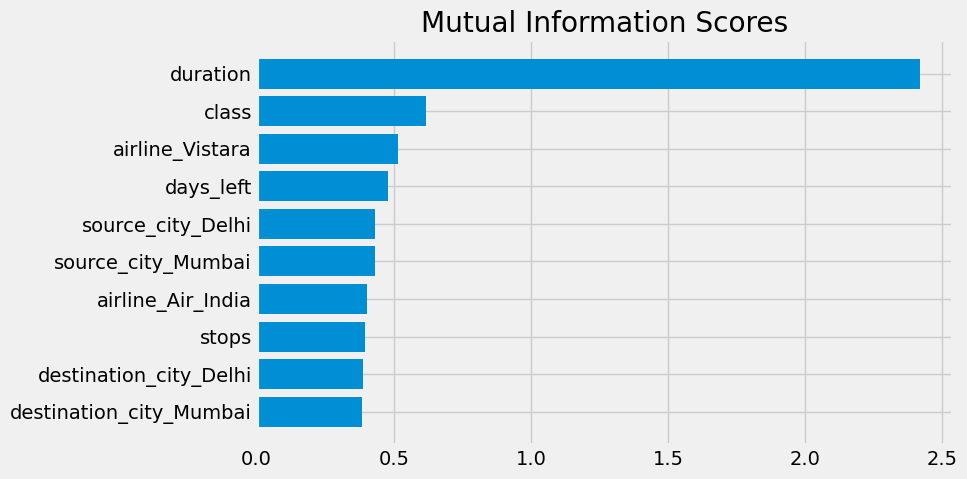

In [89]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(10))

# <p style="background-color:LightSteelBlue;font-size:100%;text-align:center;border-radius:10px 10px;height:40px;padding-top: 5px;"> 2. Predictive  Analytics </p>

In [90]:
df_bk=df.copy()


**Encoding Categorical Data**

I will encode the categoric variables for the regression.

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [92]:
x=df.drop(['price'],axis=1)
y=df['price']

Splitting the Data as Train and Test Sets

I will split the data into 2 parts as train and test sets.

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

 Normalizing Data

* Before defining regression models, I will normalize the data to make every datapoint have the same scale so each feature will be equally important. I will use the Min-Max normalization.

In [94]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

Building the Regression Models


In [95]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Squared':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Squared,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

modellr = LinearRegression()
modeldtr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelxgr = xgb.XGBRegressor()
modeletr = ExtraTreesRegressor()
modelbgr = BaggingRegressor()

MM = [modellr, modeldtr, modelrfr, modelxgr, modeletr, modelbgr]

for models in MM:
    
    models.fit(x_train, y_train)

    y_pred = models.predict(x_test)
    
    print('Model Name: ', models)

    from sklearn import metrics
    
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Squared: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Squared' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4539.344
Mean Squared Error (MSE): 48167176.637
Root Mean Squared Error (RMSE): 6940.258
R2_score: 0.906411
Root Mean Squared Log Error (RMSLE): 8.845
Mean Absolute Percentage Error (MAPE): 42.49 %
Adj R Squared:  0.906408
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1274.458
Mean Squared Error (MSE): 14042745.164
Root Mean Squared Error (RMSE): 3747.365
R2_score: 0.972715
Root Mean Squared Log Error (RMSLE): 8.229
Mean Absolute Percentage Error (MAPE): 8.67 %
Adj R Squared:  0.972714
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1171.886
Mean Squared Error (MSE): 8192439.851
Root Mean Squared Error (RMSE): 2862.244
R2_score: 0.984082
Root Mean Squared Log Error (RMSLE): 7.959


In [97]:
modeletr.fit(x_train, y_train)
    
y_pred = modeletr.predict(x_test)

In [98]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

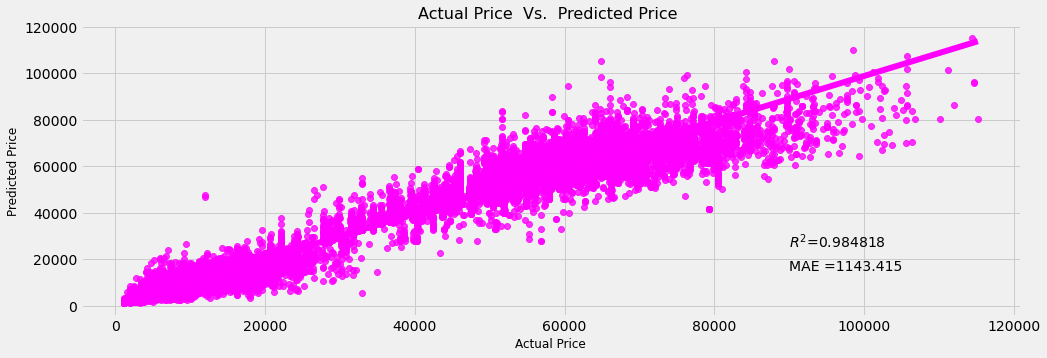

In [99]:
plt.figure(figsize=(15,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='magenta')
plt.title('Actual Price  Vs.  Predicted Price ',fontsize=16)
plt.xlabel('Actual Price',fontsize=12)
plt.ylabel('Predicted Price',fontsize=12)
r_squared = round(metrics.r2_score(y_test, y_pred),6)
Mean_Absolute_Error_MAE =  round(metrics.mean_absolute_error(y_test, y_pred),3)
plt.text(90000,25000,'$ R^{2} $=' + str(r_squared),fontsize=14)
plt.text(90000,15000,'MAE =' + str(Mean_Absolute_Error_MAE),fontsize=14)
plt.show()

conclusion

1. The ticket prices vary between classes as the mean price of Business class tickets are almost 8 times of the mean price of Economy Class tickets.

2. Vistara and Air India have wider price range than other airline companies and they have expensive tickets than others, as business class tickets are only available on Vistara and Air India. On the other hand, Air Asia offers the cheapest tickets among other airline companies. When we compare the ticket prices of Vistara and Air India, Vistara mostly offers expensive prices than Air India.

3. As the flight duration increases till 20 hours, ticket price also increases. After 20 hours, the ticket price decreases as the flight duration increases.

4. The more stops there are, the higher ticket price there are for all airlines, except for Air Asia. The ticket price ranges of Air Asia for different number of stops are similar. For this reason, The Air Asia can be the low cost airline company. 

5. As the number of days left for the departure decreases between 20 and 2 days, ticket price increases. On the other hand, ticket prices remain almost stable between 50 and 20 days left for the departure. Additionally, in business class, it is possible to find cheaper tickets in one day before the departure than the day before.

6. Flights leaving or arriving at late night have the cheaper prices compared to other times. In addition to late night, flights arriving in the early morning or leaving in the afternoon are cheaper than other options. On the other hand, flights leaving at night have the expensive prices compared to other times.

7. Flights leaving from or arriving at Delhi have the cheaper prices compared to other source and destination cities. On the other hand, other source and destination cities have similar price ranges.

8. According to the mutual information scores, knowing the duration, class, whether the airline is Vistara or Air India, the number of days left for departure, whether the source city or destination city is Delhi or Mumbai and the number of stops can result in better prediction of ticket prices.

9. According to the comparison of the result of regression models, Extra Trees Regressor, Random Forest Regressor and Bagging Regressor models have the higher R squared scores and adjusted R squared values, as they have lower error values compared to other models. Extra Trees Regressor gives the best result with R^2 score equals to 0.984700 and MAE score equals to 1151.718790.